# About the Dataset

The dataset have been taken from https://en.wikipedia.org/wiki/List_of_Manchester_United_F.C._seasons. It has 10 columns in total. Season, Division, P = Total Matches played, W = No. of matches won, D = No. of matches drawn, L = No. of matches lost, F = No. of goals scored for Manchester United, A = No. of goals conceded by Manchester United, Pts = Total points earned, Pos = The final position earned by Manchester United.

I have tried to predict the season in the next 30 years when Manchester United is going to lift the Premier League trophy. I have used several algorithms for training and testing and have chosen the best algorithm for predicting. The dataset comprises of each of the relevant data related to Manchester United since the Premier League started in 1992. 

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
import operator
import random
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')
%matplotlib inline

In [2]:
df = pd.read_csv(r'E:\Datasets\Manchester_United_prediction\PL data\Man_Utd.csv', encoding = 'unicode_escape')   
df.head(5)

,Season,Division,P,W,D,L,F,A,Pts,Pos
0,1992,Prem,42,24,12,6,67,31,84,1
1,1993,Prem,42,27,11,4,80,38,92,1
2,1994,Prem,42,26,10,6,77,28,88,2
3,1995,Prem,38,25,7,6,73,35,82,1
4,1996,Prem,38,21,12,5,76,44,75,1


In [3]:
df.isnull().sum()

Season      0
Division    0
P           0
W           0
D           0
L           0
F           0
A           0
Pts         0
Pos         0
dtype: int64

In [4]:
df = df.drop(['Division'], axis = 1)
df.head()

,Season,P,W,D,L,F,A,Pts,Pos
0,1992,42,24,12,6,67,31,84,1
1,1993,42,27,11,4,80,38,92,1
2,1994,42,26,10,6,77,28,88,2
3,1995,38,25,7,6,73,35,82,1
4,1996,38,21,12,5,76,44,75,1


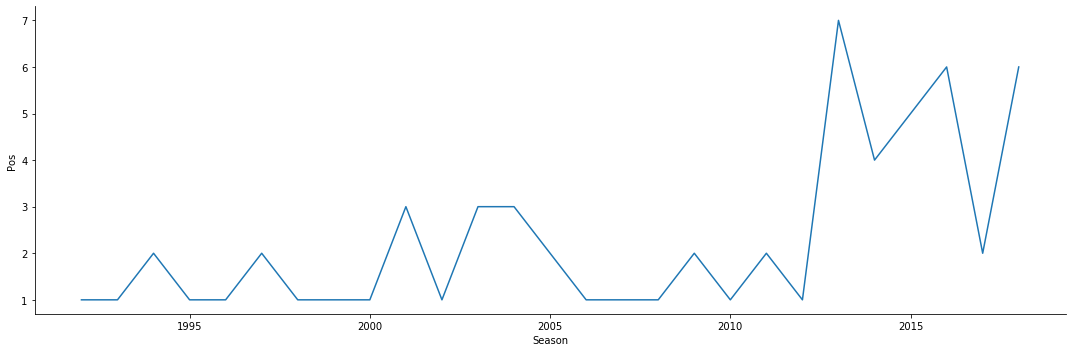

In [5]:
sns.relplot(x="Season", y="Pos", ci=None, kind="line",dashes = False, markers=True, data=df, height = 5, aspect = 3)

In [5]:
X = df[['Season', 'P', 'W', 'D', 'L', 'F', 'A', 'Pts']]
y = df[['Pos']]
X1 = df[['Season', 'P', 'W', 'D', 'L', 'F', 'A', 'Pts']]
y1 = df[['Pos']]

# Linear Models

### 1.Linear Regression

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lin_df = LinearRegression()  
lin_df.fit(X_train, y_train)
lr_pred = lin_df.predict(X_test)   
lr_pred[0:5]

array([[1.57961346],
       [1.62222552],
       [2.13701125],
       [5.25463421],
       [2.27083551]])

In [7]:
linrgr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
linrgr_r2 = r2_score(y_test, lr_pred)
print("RMSE Score for Test set: ",linrgr_rmse)
print("R2 Score: ",linrgr_r2)

RMSE Score for Test set:  0.9971829796882571
R2 Score:  0.7597485891323608


### Ridge Regression

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

from sklearn import linear_model
reg = linear_model.Ridge()
reg.fit(X_train, y_train)
rdg_pred = reg.predict(X_test)
print("The coefficients after ridge regression is :", reg.coef_)
print("The intercept after ridge regression is :", reg.intercept_)
rdg_pred[0:5]

The coefficients after ridge regression is : [[ 0.09260154  0.27926509 -0.05393454  0.1078445   0.22535513 -0.00558186
  -0.00117116 -0.05395912]]
The intercept after ridge regression is : [-190.36194644]


array([[1.57966431],
       [1.63706457],
       [2.12562397],
       [5.23046331],
       [2.23843626]])

In [9]:
rdgrgr_rmse = np.sqrt(mean_squared_error(y_test, rdg_pred))
rdgrgr_r2 = r2_score(y_test, rdg_pred)
print("RMSE Score for Test set: ",rdgrgr_rmse)
print("R2 Score: ",rdgrgr_r2)

RMSE Score for Test set:  0.997939929397257
R2 Score:  0.7593837067337283


### Lasso

In [10]:
# Finding the best value of alpha using cross validation
from sklearn.linear_model import LassoCV
regr = LassoCV()
regr.fit(X, y)
print(regr.alpha_)

1.0769854933649836


In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

from sklearn import linear_model
clf = linear_model.Lasso(alpha=regr.alpha_)
clf.fit(X_train, y_train)
las_pred = clf.predict(X_test)
print("The coefficients after lasso regression is :", clf.coef_)
print("The intercept after lasso regression is :", clf.intercept_)
las_pred[0:5]

The coefficients after lasso regression is : [ 0.05105031  0.         -0.          0.          0.         -0.03419514
  0.0023105  -0.08535248]
The intercept after lasso regression is : [-90.86651577]


array([1.77610982, 2.02160138, 1.84200343, 4.34605655, 1.4366391 ])

In [12]:
lasrgr_rmse = np.sqrt(mean_squared_error(y_test, las_pred))
lasrgr_r2 = r2_score(y_test, las_pred)
print("RMSE Score for Test set: ",lasrgr_rmse)
print("R2 Score: ",lasrgr_r2)

RMSE Score for Test set:  1.2377853766262539
R2 Score:  0.6298251343004516


### ElasticNet

In [13]:
# Finding the best value of alpha using cross validation
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV()
regr.fit(X, y)
print(regr.alpha_)

0.265551610784285


In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
# Actual regression on test set
from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha=regr.alpha_)
reg.fit(X_train, y_train)
en_pred = reg.predict(X_test)
print("The coefficients after elasticnet regression is :", reg.coef_)
print("The intercept after elasticnet regression is :", reg.intercept_)
en_pred[0:5]

The coefficients after elasticnet regression is : [ 0.07810538  0.26707061 -0.          0.          0.02802889 -0.02075427
  0.00655679 -0.11100914]
The intercept after elasticnet regression is : [-154.5981932]


array([1.61236069, 1.80678154, 2.0333411 , 4.96204577, 1.86081479])

In [15]:
enrgr_rmse = np.sqrt(mean_squared_error(y_test, en_pred))
enrgr_r2 = r2_score(y_test, en_pred)
print("RMSE Score for Test set: ",enrgr_rmse)
print("R2 Score: ",enrgr_r2)

RMSE Score for Test set:  1.022432805079632
R2 Score:  0.7474276626006162


### LassoLars

In [16]:
# Finding the best value of alpha using cross validation
from sklearn.linear_model import LassoLarsCV
regr = LassoLarsCV()
regr.fit(X, y)
print(regr.alpha_)

0.007179227436123559


In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=regr.alpha_)
reg.fit(X_train, y_train)
lslr_pred = reg.predict(X_test)
print("The coefficients after elasticnet regression is :", reg.coef_)
print("The intercept after elasticnet regression is :", reg.intercept_)
lslr_pred[0:5]

The coefficients after elasticnet regression is : [ 0.08549218  0.28475096 -0.25599251  0.          0.17511703 -0.00697308
  0.          0.        ]
The intercept after elasticnet regression is : [-174.53399145]


array([1.62690447, 1.67206735, 2.18196311, 5.17356367, 2.16564783])

In [18]:
lslrrgr_rmse = np.sqrt(mean_squared_error(y_test, lslr_pred))
lslrrgr_r2 = r2_score(y_test, lslr_pred)
print("RMSE Score for Test set: ",lslrrgr_rmse)
print("R2 Score: ",lslrrgr_r2)

RMSE Score for Test set:  0.9931054701197409
R2 Score:  0.7617093617976975


# 3.Polynomial Regression

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import PolynomialFeatures

from sklearn import linear_model

plrgr_rmse = np.zeros(9)
plrgr_r2 = np.zeros(9)

for i in range(1,10):
    poly_df = PolynomialFeatures(degree = i)
    transform_poly = poly_df.fit_transform(X_train)
    clf = linear_model.LinearRegression()
    clf.fit(transform_poly,y_train)
    polynomial_predict = clf.predict(poly_df.fit_transform(X_test))
    plrgr_rmse[i-1] = np.sqrt(mean_squared_error(y_test,polynomial_predict))
    plrgr_r2[i-1] = r2_score(y_test,polynomial_predict)
    print("\nThe predicted values with degree = ",i," is \n",polynomial_predict[0:5])
    print("\nRMSE Score of Test set for degree ", i," is: ",plrgr_rmse[i-1])
    print("R2 RMSE Score of Test set for degree ", i," is: ",plrgr_r2[i-1]) 

print("\nThe best RMSE score of Test Set is ", plrgr_rmse.min(), " with degree = ",plrgr_rmse.argmin()+1)
print("The max R2 score of Test Set is ", plrgr_r2.max(), " with degree = ",plrgr_r2.argmax()+1)


The predicted values with degree =  1  is 
 [[1.57961346]
 [1.62222552]
 [2.13701125]
 [5.25463421]
 [2.27083551]]

RMSE Score of Test set for degree  1  is:  0.9971829796882489
R2 RMSE Score of Test set for degree  1  is:  0.7597485891323648

The predicted values with degree =  2  is 
 [[  3.18304056]
 [  1.00857042]
 [  6.49935203]
 [  2.0819222 ]
 [-16.2944064 ]]

RMSE Score of Test set for degree  2  is:  7.593309047167244
R2 RMSE Score of Test set for degree  2  is:  -12.930874646231604

The predicted values with degree =  3  is 
 [[ 2.42572235]
 [ 1.10233701]
 [ 5.78914181]
 [ 5.38446535]
 [-5.04573979]]

RMSE Score of Test set for degree  3  is:  2.8991863376294242
R2 RMSE Score of Test set for degree  3  is:  -1.0308062491993026

The predicted values with degree =  4  is 
 [[ 2.41091948]
 [ 1.10060426]
 [ 5.76018235]
 [ 5.43329408]
 [-4.76494992]]

RMSE Score of Test set for degree  4  is:  2.791231001774916
R2 RMSE Score of Test set for degree  4  is:  -0.8823821355013317

Th

# 4.Decision Tree Regression

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

k = ['mse', 'friedman_mse', 'mae']
dt_rmse = np.zeros(3)
dt_r2 = np.zeros(3)
n = 0

from sklearn.tree import DecisionTreeRegressor
for i in k:
    dt_reg = DecisionTreeRegressor(criterion = i)          # create  DecisionTreeReg with sklearn
    dt_reg.fit(X_train,y_train)
    dt_predict = dt_reg.predict(X_test)
    dt_rmse[n] = np.sqrt(mean_squared_error(y_test,dt_predict))
    dt_r2[n] = r2_score(y_test,dt_predict)
    print("\nThe predicted values for Test Set using criterion = ",i," is: ",dt_predict[0:5])
    print("\nThe RMSE score for Test Set using criterion = ",i," is: ",dt_rmse[n])
    print("The R2 score for Test Set using criterion = ",i," is: ",dt_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", dt_rmse.min())
print("The max R2 score of Test Set is ", dt_r2.max())   


The predicted values for Test Set using criterion =  mse  is:  [2. 1. 2. 5. 2.]

The RMSE score for Test Set using criterion =  mse  is:  1.224744871391589
The R2 score for Test Set using criterion =  mse  is:  0.6375838926174496

The predicted values for Test Set using criterion =  friedman_mse  is:  [2. 1. 2. 4. 2.]

The RMSE score for Test Set using criterion =  friedman_mse  is:  1.5275252316519468
The R2 score for Test Set using criterion =  friedman_mse  is:  0.43624161073825496

The predicted values for Test Set using criterion =  mae  is:  [2. 1. 1. 6. 2.]

The RMSE score for Test Set using criterion =  mae  is:  1.4142135623730951
The R2 score for Test Set using criterion =  mae  is:  0.5167785234899329

The best RMSE score for Test Set is  1.224744871391589
The max R2 score of Test Set is  0.6375838926174496


# Ensemble Methods

### Random Forest Model

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

k = ['mse', 'mae']
n = 0
rf_rmse = np.zeros(2)
rf_r2 = np.zeros(2)

from sklearn.ensemble import RandomForestRegressor
for i in k:
    rf_reg = RandomForestRegressor(criterion = i)
    rf_reg.fit(X_train,y_train)
    rf_pred = rf_reg.predict(X_test)
    rf_rmse[n] = np.sqrt(mean_squared_error(y_test,rf_pred))
    rf_r2[n] = r2_score(y_test,dt_predict)
    print("\nThe predicted values for Test Set using criterion = ",i," is: ",rf_pred[0:5])
    print("\nThe RMSE score for Test Set using criterion = ",i," is: ",rf_rmse[n])
    print("The R2 score for Test Set using criterion = ",i," is: ",rf_r2[n])
    n += 1   
    
print("\nThe best RMSE score for Test Set is ", rf_rmse.min())
print("The max R2 score of Test Set is ", rf_r2.max())       


The predicted values for Test Set using criterion =  mse  is:  [1.68 1.1  1.68 4.67 1.86]

The RMSE score for Test Set using criterion =  mse  is:  1.2735056602413146
The R2 score for Test Set using criterion =  mse  is:  0.5167785234899329

The predicted values for Test Set using criterion =  mae  is:  [1.65 1.15 1.84 4.78 1.94]

The RMSE score for Test Set using criterion =  mae  is:  1.1854816180214125
The R2 score for Test Set using criterion =  mae  is:  0.5167785234899329

The best RMSE score for Test Set is  1.1854816180214125
The max R2 score of Test Set is  0.5167785234899329


### ADABoost

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

k = ['linear', 'square', 'exponential']
n = 0
adb_rmse = np.zeros(3)
adb_r2 = np.zeros(3)

from sklearn.ensemble import AdaBoostRegressor
for i in k:
    ada_regr = AdaBoostRegressor(loss = i)
    ada_regr.fit(X_train,y_train)
    ada_pred = ada_regr.predict(X_test)
    adb_rmse[n] = np.sqrt(mean_squared_error(y_test,ada_pred))
    adb_r2[n] = r2_score(y_test,ada_pred)
    print("\nThe predicted values for Test Set using loss = ",i," is: ",ada_pred[0:5])
    print("\nThe RMSE score for Test Set using loss = ",i," is: ",adb_rmse[n])
    print("The R2 score for Test Set using loss = ",i," is: ",adb_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", adb_rmse.min())
print("The max R2 score of Test Set is ", adb_r2.max())           


The predicted values for Test Set using loss =  linear  is:  [1.63636364 1.         1.         5.         2.        ]

The RMSE score for Test Set using loss =  linear  is:  1.378704626191191
The R2 score for Test Set using loss =  linear  is:  0.5407399190193577

The predicted values for Test Set using loss =  square  is:  [1.  1.  2.  5.  1.8]

The RMSE score for Test Set using loss =  square  is:  1.1284207253207172
The R2 score for Test Set using loss =  square  is:  0.6923489932885906

The predicted values for Test Set using loss =  exponential  is:  [1.83333333 1.         1.09090909 5.         2.        ]

The RMSE score for Test Set using loss =  exponential  is:  1.3747164885664
The R2 score for Test Set using loss =  exponential  is:  0.5433930519348457

The best RMSE score for Test Set is  1.1284207253207172
The max R2 score of Test Set is  0.6923489932885906


### Gradient Boosting

In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

k = ['ls', 'lad', 'huber', 'quantile']
n = 0
gdb_rmse = np.zeros(4)
gdb_r2 = np.zeros(4)

from sklearn.ensemble import GradientBoostingRegressor

for i in k:
    reg = GradientBoostingRegressor(loss = i)
    reg.fit(X_train, y_train)
    grdbst_pred = reg.predict(X_test)
    gdb_rmse[n] = np.sqrt(mean_squared_error(y_test,grdbst_pred))
    gdb_r2[n] = r2_score(y_test,grdbst_pred)
    print("\nThe predicted values for Test Set using loss = ",i," is: ",grdbst_pred[0:5])
    print("\nThe RMSE score for Test Set using loss = ",i," is: ",gdb_rmse[n])
    print("The R2 score for Test Set using loss = ",i," is: ",gdb_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", gdb_rmse.min())
print("The max R2 score of Test Set is ", gdb_r2.max())    


The predicted values for Test Set using loss =  ls  is:  [2.10055404 1.01620884 1.192849   4.86760217 2.09243619]

The RMSE score for Test Set using loss =  ls  is:  1.3733375716082044
The R2 score for Test Set using loss =  ls  is:  0.5443085967700274

The predicted values for Test Set using loss =  lad  is:  [1.         1.         1.99997344 1.99997344 1.        ]

The RMSE score for Test Set using loss =  lad  is:  2.1602612442982037
The R2 score for Test Set using loss =  lad  is:  -0.12753175282017226

The predicted values for Test Set using loss =  huber  is:  [2.02634184 1.00366966 1.09260654 4.79340164 2.02772353]

The RMSE score for Test Set using loss =  huber  is:  1.3924784469601623
The R2 score for Test Set using loss =  huber  is:  0.531517690543966

The predicted values for Test Set using loss =  quantile  is:  [3.70529375 3.70529375 3.70529375 5.03247213 3.70529375]

The RMSE score for Test Set using loss =  quantile  is:  1.932670852831446
The R2 score for Test Set us

# KNearestNeighbor

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsRegressor

n = 0
knn_rmse = np.zeros(9)
knn_r2 = np.zeros(9)

for i in range(1,10):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    knn_pred = neigh.predict(X_test)
    knn_rmse[n] = np.sqrt(mean_squared_error(y_test,knn_pred))
    knn_r2[n] = r2_score(y_test,knn_pred)
    print("\nThe predicted values for Test Set with neighbor k = ",i," is: \n",knn_pred[0:5])
    print("\nThe RMSE score for Test Set with neighbor k = ",i," is: ",knn_rmse[n])
    print("The R2 score for Test Set with neighbor k = ",i," is: ",knn_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", knn_rmse.min(), " with neighbor k = ", knn_rmse.argmin()+1)
print("The max R2 score of Test Set is ", knn_r2.max(), " with neighbor k = ", knn_r2.argmax()+1)   


The predicted values for Test Set with neighbor k =  1  is: 
 [[1.]
 [1.]
 [1.]
 [4.]
 [1.]]

The RMSE score for Test Set with neighbor k =  1  is:  1.5275252316519468
The R2 score for Test Set with neighbor k =  1  is:  0.43624161073825496

The predicted values for Test Set with neighbor k =  2  is: 
 [[1. ]
 [1. ]
 [1. ]
 [5. ]
 [1.5]]

The RMSE score for Test Set with neighbor k =  2  is:  1.2583057392117916
The R2 score for Test Set with neighbor k =  2  is:  0.6174496644295302

The predicted values for Test Set with neighbor k =  3  is: 
 [[1.33333333]
 [1.        ]
 [1.        ]
 [5.        ]
 [1.66666667]]

The RMSE score for Test Set with neighbor k =  3  is:  1.2692955176439846
The R2 score for Test Set with neighbor k =  3  is:  0.610738255033557

The predicted values for Test Set with neighbor k =  4  is: 
 [[1.25]
 [1.25]
 [1.  ]
 [5.25]
 [1.5 ]]

The RMSE score for Test Set with neighbor k =  4  is:  1.1902380714238083
The R2 score for Test Set with neighbor k =  4  is:  

# Stochastic Gradient Descent

In [25]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import SGDRegressor
reg = SGDRegressor()
reg.fit(X_train, y_train)
sgd_pred = reg.predict(X_test)
sgd_pred[0:5]

array([1.36683989, 1.70131832, 1.65879737, 4.69130018, 1.96084502])

In [26]:
sgd_rmse = np.sqrt(mean_squared_error(y_test,sgd_pred))
sgd_r2 = r2_score(y_test,sgd_pred)
print("RMSE Score for Test set: ",sgd_rmse)
print("R2 Score for Test set: ",sgd_r2)

RMSE Score for Test set:  1.188136206245974
R2 Score for Test set:  0.6589259382192434


# Support Vector Machines

### SVR

In [27]:
#X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVR
k = ['linear', 'poly', 'rbf', 'sigmoid']
n = 0
svr_rmse = np.zeros(4)
svr_r2 = np.zeros(4)

for i in k:
    reg = SVR(kernel = i)
    reg.fit(X_train, y_train)
    svr_pred = reg.predict(X_test)
    svr_rmse[n] = np.sqrt(mean_squared_error(y_test,svr_pred))
    svr_r2[n] = r2_score(y_test,svr_pred)
    print("\nThe predicted values for Test Set with kernel = ",i," is: ",svr_pred[0:5])
    print("\nThe RMSE score for Test Set with kernel = ",i," is: ",svr_rmse[n])
    print("The R2 score for Test Set with kernel = ",i," is: ",svr_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", svr_rmse.min())
print("The max R2 score of Test Set is ", svr_r2.max())         


The predicted values for Test Set with kernel =  linear  is:  [1.54398721 1.44360768 2.23734096 5.26736291 2.19228195]

The RMSE score for Test Set with kernel =  linear  is:  0.9685241151876802
The R2 score for Test Set with kernel =  linear  is:  0.7733597139516588

The predicted values for Test Set with kernel =  poly  is:  [1.65047787 1.64945446 1.37405485 5.04581271 2.11618651]

The RMSE score for Test Set with kernel =  poly  is:  1.2760816007488038
The R2 score for Test Set with kernel =  poly  is:  0.6065648787670693

The predicted values for Test Set with kernel =  rbf  is:  [1.20421134 1.03344859 1.89487548 3.66746999 2.03868186]

The RMSE score for Test Set with kernel =  rbf  is:  1.5569739481545886
The R2 score for Test Set with kernel =  rbf  is:  0.4142950100110393

The predicted values for Test Set with kernel =  sigmoid  is:  [1.61233885 1.57518346 2.66090568 4.53493766 2.10052948]

The RMSE score for Test Set with kernel =  sigmoid  is:  1.1615607669534436
The R2 sco

### NuSVR

In [28]:
#X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

from sklearn.svm import NuSVR
k = ['linear', 'poly', 'rbf', 'sigmoid']
n = 0
nusvr_rmse = np.zeros(4)
nusvr_r2 = np.zeros(4)

for i in k:
    reg = NuSVR(kernel = i)
    reg.fit(X_train, y_train)
    nusvr_pred = reg.predict(X_test)
    nusvr_rmse[n] = np.sqrt(mean_squared_error(y_test,nusvr_pred))
    nusvr_r2[n] = r2_score(y_test,nusvr_pred)
    print("\nThe predicted values for Test Set with kernel = ",i," is: ",nusvr_pred[0:5])
    print("\nThe RMSE score for Test Set with kernel = ",i," is: ",nusvr_rmse[n])
    print("The R2 score for Test Set with kernel = ",i," is: ",nusvr_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", nusvr_rmse.min())
print("The max R2 score of Test Set is ", nusvr_r2.max())         


The predicted values for Test Set with kernel =  linear  is:  [1.45739436 1.69701344 1.65806374 4.87838965 2.08367994]

The RMSE score for Test Set with kernel =  linear  is:  1.1519512054038563
The R2 score for Test Set with kernel =  linear  is:  0.6793845847870448

The predicted values for Test Set with kernel =  poly  is:  [1.61265089 1.61892594 1.31835325 4.57007705 1.92228673]

The RMSE score for Test Set with kernel =  poly  is:  1.3991703355575917
The R2 score for Test Set with kernel =  poly  is:  0.5270040630566686

The predicted values for Test Set with kernel =  rbf  is:  [1.31434575 1.17461074 1.92496727 3.56239909 1.85281946]

The RMSE score for Test Set with kernel =  rbf  is:  1.5653457309570915
The R2 score for Test Set with kernel =  rbf  is:  0.40797945458173634

The predicted values for Test Set with kernel =  sigmoid  is:  [1.73808887 1.83846981 2.54292789 3.95632297 1.80682178]

The RMSE score for Test Set with kernel =  sigmoid  is:  1.337053520396863
The R2 sco

### LinearSVR

In [29]:
#X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

from sklearn.svm import LinearSVR

reg = LinearSVR()
reg.fit(X_train, y_train)
linsvr_pred = reg.predict(X_test)
linsvr_rmse = np.sqrt(mean_squared_error(y_test,linsvr_pred))
linsvr_r2 = r2_score(y_test,linsvr_pred)
print("\nThe predicted values for Test Set is: ",linsvr_pred[0:5])
print("\nThe RMSE score for Test Set is: ",linsvr_rmse)
print("The R2 score for Test Set is: ",linsvr_r2)  


The predicted values for Test Set is:  [1.58262906 1.4801285  2.07500242 5.05749503 2.36061874]

The RMSE score for Test Set is:  1.088551498566798
The R2 score for Test Set is:  0.7137047171734714


# Report on accuracy of different algorithms using RMSE value and R2 score

In [30]:
# rmse = root mean squared score.......r2 = R2-Score
# 1.Linear Models
# 1.1. Linear Regression
linrgr_rmse
linrgr_r2

# 1.2. Ridge Regression
rdgrgr_rmse
rdgrgr_r2

# 1.3. Lasso
lasrgr_rmse
lasrgr_r2

# 1.4. ElasticNet
enrgr_rmse
enrgr_r2

# 1.5. LarsLasso
lslrrgr_rmse
lslrrgr_r2

# 2.Polynomial Regression
plrgr_rmse = plrgr_rmse.min()
plrgr_r2 = plrgr_r2.max()

# 3.Decision Tree
dt_rmse = dt_rmse.min()
dt_r2 = dt_r2.max()

# 4.Ensemble Methods
# 4.1. Random Forest
rf_rmse = rf_rmse.min()
rf_r2 = rf_r2.max()

# 4.2. AdaBoost
adb_rmse = adb_rmse.min()
adb_r2 = adb_r2.max()

# 4.3. GradientBoost
gdb_rmse = gdb_rmse.min()
gdb_r2 = gdb_r2.max()

# 5.KNearestNeighbor
knn_rmse = knn_rmse.min()
knn_r2 = knn_r2.max()

# 6.Stochastic Gradient Descent
sgd_rmse
sgd_r2

# 7.Support Vector Machines
# 7.1. SVR
svr_rmse = svr_rmse.min()
svr_r2 = svr_r2.max()

# 7.2. NuSVR
nusvr_rmse = nusvr_rmse.min()
nusvr_r2 = nusvr_r2.max()
# 7.3. LinearSVR
linsvr_rmse = linsvr_rmse
linsvr_r2 = linsvr_r2

#max of all
min_rmse = [linrgr_rmse,rdgrgr_rmse,lasrgr_rmse,enrgr_rmse,lslrrgr_rmse,plrgr_rmse,dt_rmse,rf_rmse,adb_rmse,gdb_rmse,knn_rmse,sgd_rmse,svr_rmse,nusvr_rmse,linsvr_rmse]
max_r2 = [linrgr_r2,rdgrgr_r2,lasrgr_r2,enrgr_r2,lslrrgr_r2,plrgr_r2,dt_r2,rf_r2,adb_r2,gdb_r2,knn_r2,sgd_r2,svr_r2,nusvr_r2,linsvr_r2]

## Final Report

In [31]:
data = {'Algorithm':['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'LarsLasso Regression', 'Polynomial Regression','Decision Tree Regression','Random Forest Regression','AdaBoost Regression','Gradient Boosting Regression','KNearest Neighbor Regression','Stochastic Gradient Regression','Support Vector Regression','Nu Support Vector Regression','Linear Support Vector Regression'], 
        'R2-Sore':max_r2, 'Root Mean Squared Error':min_rmse}
s = pd.DataFrame(data, index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
s

,Algorithm,R2-Sore,Root Mean Squared Error
1,Linear Regression,0.759749,0.997183
2,Ridge Regression,0.759384,0.997940
3,Lasso Regression,0.629825,1.237785
4,ElasticNet Regression,0.747428,1.022433
5,LarsLasso Regression,0.761709,0.993105
6,Polynomial Regression,0.759749,0.997183
7,Decision Tree Regression,0.637584,1.224745
8,Random Forest Regression,0.516779,1.185482
9,AdaBoost Regression,0.692349,1.128421
10,Gradient Boosting Regression,0.544309,1.373338


In [33]:
print("The best R-squared score is shown by Linear Regression")
print("\nR2 Score = ",linrgr_r2)

The best R-squared score is shown by Linear Regression

R2 Score =  0.7597485891323608


# Creating a test set for the next 30 years and predicting Manchester United's League Standing using the best algorithm.

In [32]:
fd = pd.read_csv(r'E:\Datasets\Manchester_United_prediction\PL data\Man_Utd.csv', encoding = 'unicode_escape')   
fd.head(5)

,Season,Division,P,W,D,L,F,A,Pts,Pos
0,1992,Prem,42,24,12,6,67,31,84,1
1,1993,Prem,42,27,11,4,80,38,92,1
2,1994,Prem,42,26,10,6,77,28,88,2
3,1995,Prem,38,25,7,6,73,35,82,1
4,1996,Prem,38,21,12,5,76,44,75,1


In [33]:
fd = fd.drop(['Division'], axis = 1)

In [34]:
print("mean of W = ",round(fd.W.mean()))
print("std of W = ",round(fd.W.std()))
min1 = round(fd.W.mean())-round(fd.W.std())
max1 = round(fd.W.mean())+round(fd.W.std())
print("The random value which we require is between ",min1," and ",max1)

mean of W =  24
std of W =  3
The random value which we require is between  21  and  27


In [35]:
w = np.zeros(30)
for i in range(0,30):
    w[i] = random.randint(21,27)

In [36]:
print("mean of D = ",round(fd.D.mean()))
print("std of D = ",round(fd.D.std()))
min2 = round(fd.D.mean())-round(fd.D.std())
max2 = round(fd.D.mean())+round(fd.D.std())
print("The random value which we require is between ",min2," and ",max2)

mean of D =  8
std of D =  3
The random value which we require is between  5  and  11


In [37]:
d = np.zeros(30)
for i in range(0,30):
    d[i] = random.randint(5,11)

In [38]:
l = np.zeros(30)
for i in range(0,30):
    l[i] = (38 - (w[i]+d[i]))

In [39]:
print("mean of F = ",round(fd.F.mean()))
print("std of F = ",round(fd.F.std()))
min4 = round(fd.F.mean())-round(fd.F.std())
max4 = round(fd.F.mean())+round(fd.F.std())
print("The random value which we require is between ",min4," and ",max4)

mean of F =  74
std of F =  11
The random value which we require is between  63  and  85


In [40]:
f = np.zeros(30)
for i in range(0,30):
    f[i] = random.randint(63,85)

In [41]:
print("mean of A = ",round(fd.A.mean()))
print("std of A = ",round(fd.A.std()))
min5 = round(fd.A.mean())-round(fd.A.std())
max5 = round(fd.A.mean())+round(fd.A.std())
print("The random value which we require is between ",min5," and ",max5)

mean of A =  34
std of A =  8
The random value which we require is between  26  and  42


In [42]:
a = np.zeros(30)
for i in range(0,30):
    a[i] = random.randint(26,42)

In [43]:
p = np.zeros(30)
for i in range(0,30):
    p[i] = (3*w[i]+d[i])

In [44]:
n = 0
test_set = np.zeros((30,8))
s = 38
for i in range(2019,2049):
    test_set[n] = [i, s, w[n], d[n], l[n], f[n], a[n], p[n]]
    n += 1

In [45]:
test_set[0:5]

array([[2019.,   38.,   24.,    6.,    8.,   70.,   27.,   78.],
       [2020.,   38.,   22.,    5.,   11.,   71.,   34.,   71.],
       [2021.,   38.,   21.,    9.,    8.,   68.,   27.,   72.],
       [2022.,   38.,   22.,    9.,    7.,   67.,   30.,   75.],
       [2023.,   38.,   26.,    6.,    6.,   81.,   37.,   84.]])

### 1.Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
lin_df = LinearRegression()  
lin_df.fit(X1, y1)
lr_pred = lin_df.predict(test_set)   
lr_pred[0:5]

array([[3.98300657],
       [5.50802077],
       [4.99358512],
       [4.53774963],
       [3.34742227]])

In [47]:
plpred = np.floor(lr_pred)
plpred[0:5]

array([[3.],
       [5.],
       [4.],
       [4.],
       [3.]])